# The Capacitance Matrix of Fluxonium Qubits

## Sections
1. Prepare the layout in qiskit-metal. <br>
1. Run finite element LOM analysis. <br>


In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

### Create the Qubit design

Setup a design of a given dimension. Dimensions will be respected in the design rendering. <br>
Note that the design size extends from the origin into the first quadrant.

Here we have only one of the qubits.

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.material = 'silicon'
design.chips.main.size['size_x'] = '9mm'
design.chips.main.size['size_y'] = '9mm'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'

design.delete_all_components()

hfss = design.renderers.hfss
gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

# Q1 details
options = dict(chip='main', pad_gap='30um', orientation='0',
        pad_width='15um', pad_height='140um', pad_radius='80um',  
        l_arm_length='50um', l_arm_width='2um', l_length='80um', l_width='2um',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='150um', fbl_height ='50um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_length = '80um', cl_sep ='10um' ), 
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '350um', pad_height = '90um',
            pad_sep='65um'))
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
        **options))

gui.rebuild()
#gui.autoscale()

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

 

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  vertices = concatenate([

  vertices = concatenate([

  vertices = concatenate([



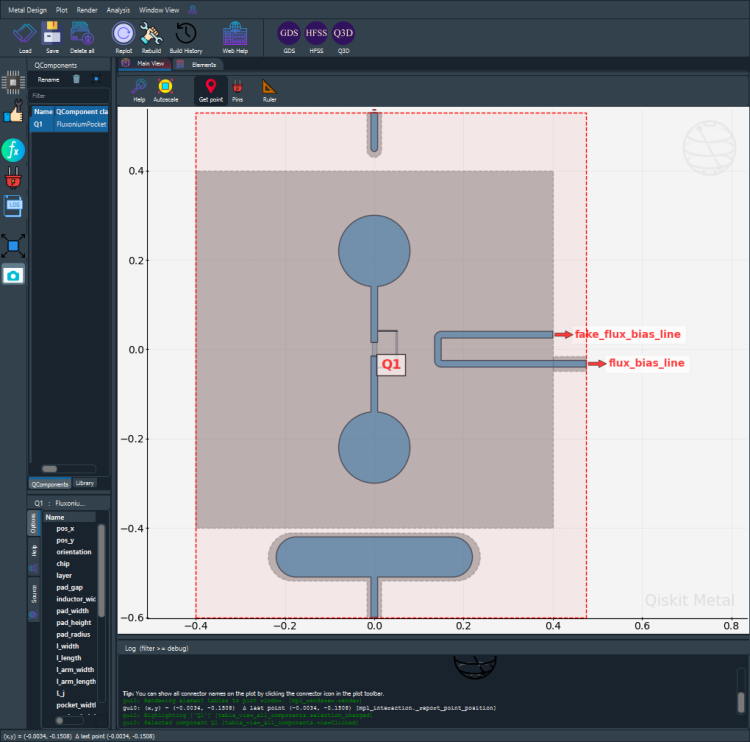

In [4]:
gui.screenshot()

## 2. Capacitance Analysis and LOM derivation using the analysis package - most users

In [5]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [7]:
# for second method. dont run this
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [8]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 09:46PM [connect_project]: Connecting to Ansys Desktop API...
INFO 09:46PM [load_ansys_project]: 	Opened Ansys App
INFO 09:46PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 09:46PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project22
INFO 09:46PM [connect_design]: No active design found (or error getting active design).
INFO 09:46PM [connect]: 	 Connected to project "Project22". No design detected
INFO 09:46PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 09:46PM [connect_setup]: 	No design setup detected.
WARNING 09:46PM [connect_setup]: 	Creating Q3D default setup.
INFO 09:46PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 09:46PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 09:46PM [analyze]: Analyzing setup Setup
INFO 09:50PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppDat

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,16.82387,-0.03335,-16.43416,-0.03106,-0.20111,-0.01238
flux_bias_line_Q1,-0.03335,56.62981,-45.29030,-4.52646,-4.51637,-1.01753
ground_main_plane,-16.43416,-45.29030,327.21246,-31.66311,-35.71886,-128.28286
pad_bot_Q1,-0.03106,-4.52646,-31.66311,49.00335,-5.33723,-5.18592
pad_top_Q1,-0.20111,-4.51637,-35.71886,-5.33723,48.95998,-0.82559
readout_padNline_Q1,-0.01238,-1.01753,-128.28286,-5.18592,-0.82559,136.65395


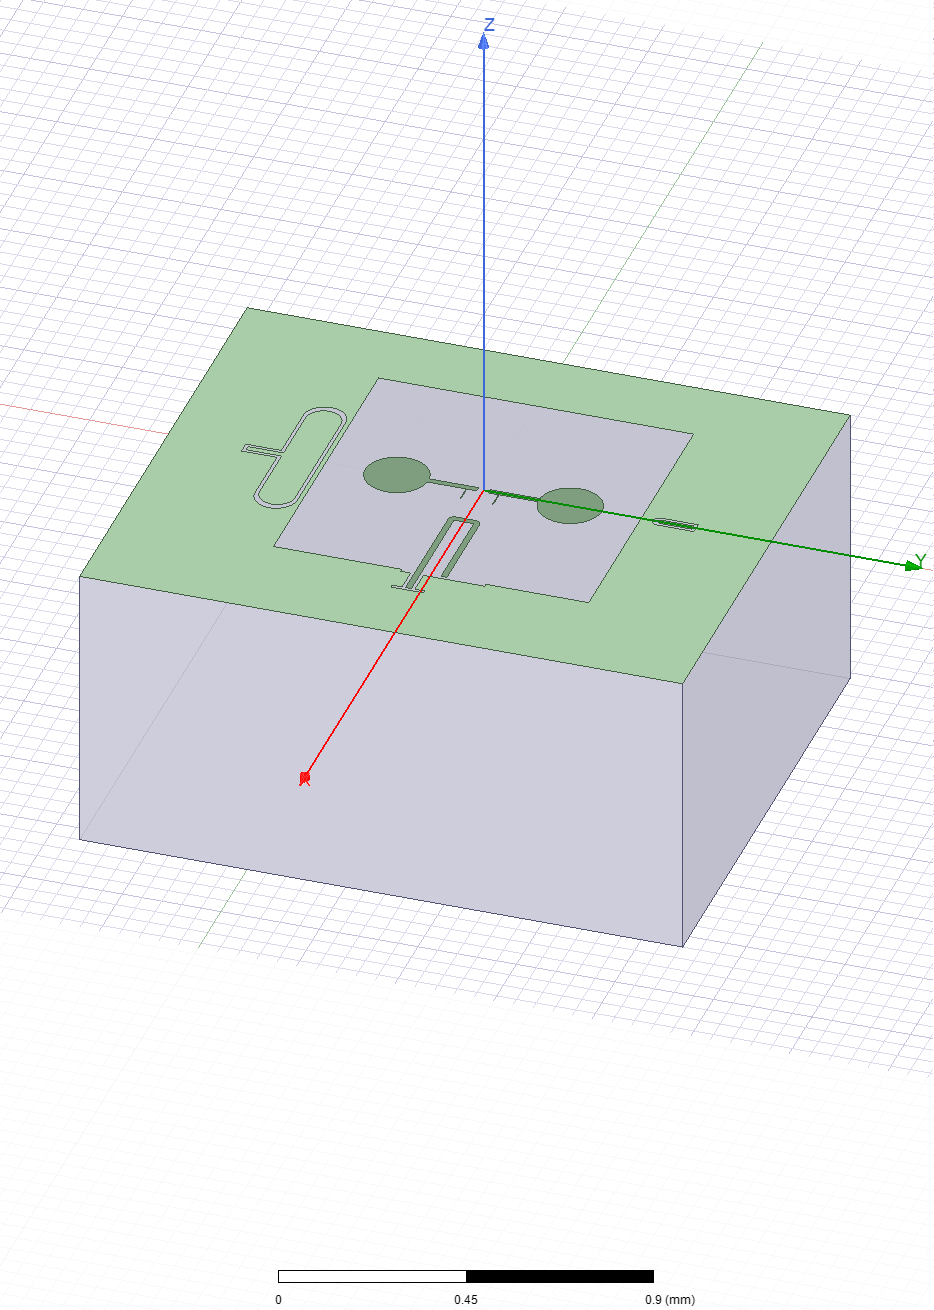

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/Fluxonuim/ansys.png')

In [10]:
c1.sim.save_screenshot()

In [13]:
c1.sim.close()